# 1. Importing Packages and Collecting Data

In [1]:
'''Importing Data Manipulattion Moduls'''
import numpy as np
import pandas as pd

'''Seaborn and Matplotlib Visualization'''
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

'''Importing preprocessing libraries'''
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

In [2]:
'''Installing tensorflow version 2.0'''
!pip install tensorflow==2.0.0-rc1

     |████████████████████████████████| 86.3MB 341kB/s 
     |████████████████████████████████| 501kB 32.4MB/s 
     |████████████████████████████████| 4.3MB 21.9MB/s 
     |████████████████████████████████| 71kB 15.5MB/s 
  Created wheel for opt-einsum: filename=opt_einsum-3.1.0-cp36-none-any.whl size=61682 sha256=3a70ee331edfa96462ad9a494650b667aab494b2cc8f5522ca66414fc7411044
  Stored in directory: /tmp/.cache/pip/wheels/2c/b1/94/43d03e130b929aae7ba3f8d15cbd7bc0d1cb5bb38a5c721833
Successfully built opt-einsum
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0


In [3]:
'''Importing tensorflow libraries'''
import tensorflow as tf 
print(tf.__version__)

from tensorflow.keras import layers, models

2.0.0-rc1


In [4]:
'''Read in train and test data from csv files'''
train = pd.read_csv('../input/digit-recognizer/train.csv')
test = pd.read_csv('../input/digit-recognizer/test.csv')

# 2. Variable Description and Identification

In [5]:
'''Train and test data at a glance.'''
bold('**Preview of Train Data:**')
display(train.head(3))
bold('**Preview of Test Data:**')
display(test.head(3))

**Preview of Train Data:**

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Preview of Test Data:**

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
'''Ckecking for null and missing values'''
bold('**Train Data**')
display(train.isnull().any(). describe())
bold('**Test Data**')
display(test.isnull().any(). describe())

**Train Data**

count       785
unique        1
top       False
freq        785
dtype: object

**Test Data**

count       784
unique        1
top       False
freq        784
dtype: object

In [7]:
'''Seting X and Y'''
y_train = train['label']

# Drop 'label' column
X_train = train.drop('label', axis = 1)

X_test = test

In [8]:
"""Let's have a final look at our data"""
bold('**Data Dimension for Model Building:**')
print('Input matrix dimension:', X_train.shape)
print('Output vector dimension:',y_train.shape)
print('Test data dimension:', X_test.shape)

**Data Dimension for Model Building:**

Input matrix dimension: (42000, 784)
Output vector dimension: (42000,)
Test data dimension: (28000, 784)


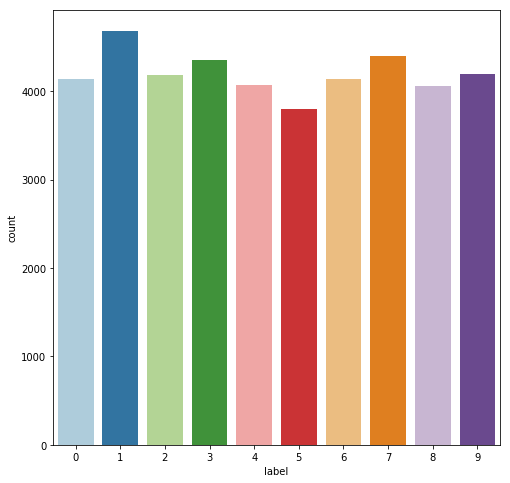

In [9]:
plt.figure(figsize = (8,8))
sns.countplot(y_train, palette='Paired')
plt.show()

In [10]:
images = train.iloc[:,1:].values
images = images.astype(np.float)

# convert from [0:255] => [0.0:1.0]
images = np.multiply(images, 1.0 / 255.0)

image_size = images.shape[1]
print('image_size => {0}'.format(image_size))

# in this case all images are square
image_width = image_height = np.ceil(np.sqrt(image_size)).astype(np.uint8)

print('image_width => {0}\nimage_height => {1}'.format(image_width, image_height))

image_size => 784
image_width => 28
image_height => 28


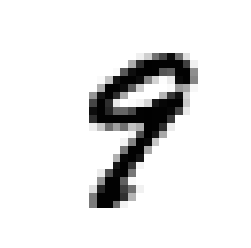

In [11]:
'''Displaying image'''
# display image
def display(img):
    
    # (784) => (28,28)
    one_image = img.reshape(image_width,image_height)
    
    plt.axis('off')
    plt.imshow(one_image, cmap='binary')

# output image     
display(images[11])

# 3. Data Preprocessing

## 3.1 Normalize Images
Rescale pixel values from the range of 0-255 to the range 0-1 preferred for neural network models.

Scaling data to the range of 0-1 is traditionally referred to as normalization.

This can be achieved by setting the rescale argument to a ratio by which each pixel can be multiplied to achieve the desired range.

In this case, the ratio is 1/255 or about 0.0039.

In [12]:
'''Normalizing the data'''
X_train = X_train / 255.0
X_test = X_test / 255.0

## 3.2 One Hot Ecoding

In [13]:
'''Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)'''
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

In [14]:
'''convert class labels from scalars to one-hot vectors'''
# 0 => [1 0 0 0 0 0 0 0 0 0]
# 1 => [0 1 0 0 0 0 0 0 0 0]
# ...
# 9 => [0 0 0 0 0 0 0 0 0 1]
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10, dtype='uint8')

## 3.3 Split data into train and valdiation set


In [15]:
'''Set the random seed'''
seed = 44
'''Split the train and the validation set for the fitting'''
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=seed)

# 4. Model ANN
![](https://image.ibb.co/jYevxc/5.jpg)

## 4.1 Outline the model ANN

In [16]:
'''weight initialization'''
input_size = 784
output_size = 10
hidden_layer_size = 250

model = tf.keras.Sequential([
                            tf.keras.layers.Flatten(input_shape = (28,28,1)),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation= 'relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation= 'relu'),
                            tf.keras.layers.Dense(output_size, activation='softmax')
                             ])

## 4.2 Optimizer And Loss function

In [17]:
OPTIMIZER = tf.optimizers.Adam(
                    learning_rate=0.001,
                    beta_1=0.9,
                    beta_2=0.999,
                    epsilon=1e-07,
                    amsgrad=False,
                   )

model.compile(optimizer=OPTIMIZER, loss='categorical_crossentropy', metrics=['accuracy'])

## 4.3 Training

In [18]:
NUM_EPOCHS = 5
BATCH_SIZE = 100

History = model.fit(X_train, y_train, batch_size = BATCH_SIZE, epochs = NUM_EPOCHS, validation_data = (X_val, y_val), verbose = 2)

Train on 37800 samples, validate on 4200 samples
Epoch 1/5
37800/37800 - 3s - loss: 0.2918 - accuracy: 0.9145 - val_loss: 0.1627 - val_accuracy: 0.9557
Epoch 2/5
37800/37800 - 2s - loss: 0.1097 - accuracy: 0.9656 - val_loss: 0.1227 - val_accuracy: 0.9636
Epoch 3/5
37800/37800 - 2s - loss: 0.0714 - accuracy: 0.9776 - val_loss: 0.1094 - val_accuracy: 0.9679
Epoch 4/5
37800/37800 - 2s - loss: 0.0460 - accuracy: 0.9851 - val_loss: 0.1175 - val_accuracy: 0.9695
Epoch 5/5
37800/37800 - 2s - loss: 0.0383 - accuracy: 0.9880 - val_loss: 0.1044 - val_accuracy: 0.9710


## 4.4 Evaluate the model

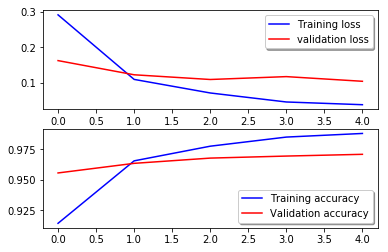

In [19]:
'''Training and validation curves'''
fig, ax = plt.subplots(2,1)
ax[0].plot(History.history['loss'], color='b', label="Training loss")
ax[0].plot(History.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(History.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(History.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

# Prediction and Submission

In [20]:
'''predict results'''
results = model.predict(X_test)

'''select the indix with the maximum probability'''
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [21]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("submission_nn_mnist.csv",index=False)

# 5. Model CNN
![](https://image.ibb.co/mGJWpp/gec2.jpg)

## 5.1 Outline the model CNN

In [22]:
'''Set the CNN model'''
# CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28,28,1)))
model.add(layers.Conv2D(32, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
          
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
          
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation='softmax'))

## 5.2 Compile and Train the model

In [23]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size = BATCH_SIZE, epochs = 10, validation_data = (X_val, y_val), verbose = 2)

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 - 69s - loss: 0.3586 - accuracy: 0.8844 - val_loss: 0.0779 - val_accuracy: 0.9750
Epoch 2/10
37800/37800 - 68s - loss: 0.0898 - accuracy: 0.9737 - val_loss: 0.0533 - val_accuracy: 0.9836
Epoch 3/10
37800/37800 - 68s - loss: 0.0636 - accuracy: 0.9814 - val_loss: 0.0507 - val_accuracy: 0.9845
Epoch 4/10
37800/37800 - 69s - loss: 0.0514 - accuracy: 0.9845 - val_loss: 0.0447 - val_accuracy: 0.9874
Epoch 5/10
37800/37800 - 68s - loss: 0.0445 - accuracy: 0.9876 - val_loss: 0.0450 - val_accuracy: 0.9874
Epoch 6/10
37800/37800 - 69s - loss: 0.0370 - accuracy: 0.9896 - val_loss: 0.0392 - val_accuracy: 0.9879
Epoch 7/10
37800/37800 - 68s - loss: 0.0325 - accuracy: 0.9907 - val_loss: 0.0452 - val_accuracy: 0.9871
Epoch 8/10
37800/37800 - 70s - loss: 0.0301 - accuracy: 0.9911 - val_loss: 0.0368 - val_accuracy: 0.9890
Epoch 9/10
37800/37800 - 68s - loss: 0.0264 - accuracy: 0.9925 - val_loss: 0.0458 - val_accuracy: 0.9883
Epoch 

## 5.4 Evaluate the model

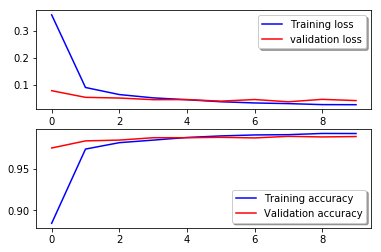

In [24]:
'''Training and validation curves'''
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

# Prediction and Submission

In [25]:
'''predict results'''
results = model.predict(X_test)

'''select the indix with the maximum probability'''
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [26]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("submission_cnn_mnist.csv",index=False)

### REFERENCES NOTE:
1. https://www.kaggle.com/kanncaa1/convolutional-neural-network-cnn-tutorial
2. https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners
3. https://www.tensorflow.org
4. https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6